In [441]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas-profiling
from pandas_profiling import ProfileReport

df=pd.read_csv(r"C:\Users\Shashwat\Downloads\archive (1)\drugsComTest_raw.csv")
df=df[df['condition'].isin(['Diabetes, Type 1','Diabetes, Type 2'])]
dft=pd.read_csv(r"C:\Users\Shashwat\Downloads\archive (1)\drugsComTrain_raw.csv")
df2=dft[dft['condition'].isin(['Diabetes, Type 1','Diabetes, Type 2'])]
final=df.merge(df2,how='outer')
final=final.drop(columns=['review','date','usefulCount','uniqueID'])

In [442]:

final=final.drop_duplicates()
type1=final[final['condition'].isin(['Diabetes, Type 1'])].drop(columns=['condition'])
type2=final[final['condition'].isin(['Diabetes, Type 2'])].drop(columns=['condition'])



In [239]:
type1

,drugName,rating
1,Afrezza,10
2,"Insulin inhalation, rapid acting",1
55,Basaglar,4
63,Insulin glargine,1
87,Tresiba,1
...,...,...
3322,ReliOn / Novolin 70 / 30,9
3363,Lantus,9
3440,Insulin degludec,6
3471,"Insulin inhalation, rapid acting",7


In [243]:
type2

,drugName,rating
0,Actos,4
3,Liraglutide,9
4,Glyburide,9
5,Dulaglutide,1
6,Canagliflozin,6
...,...,...
3436,Metformin / sitagliptin,8
3522,Onglyza,6
3526,Avandia,8
3533,Acarbose,1


In [244]:
type2['drugName'].value_counts()

Actos                         10
Pioglitazone                  10
Empagliflozin                 10
Sitagliptin                   10
Glipizide                     10
                              ..
Glimepiride / pioglitazone     1
Pramlintide                    1
Nateglinide                    1
Apidra                         1
Kazano                         1
Name: drugName, Length: 97, dtype: int64

In [443]:
type2['drugName'].nunique

<bound method IndexOpsMixin.nunique of 0                         Actos
3                   Liraglutide
4                     Glyburide
5                   Dulaglutide
6                 Canagliflozin
                 ...           
3436    Metformin / sitagliptin
3522                    Onglyza
3526                    Avandia
3533                   Acarbose
3534                  Glipizide
Name: drugName, Length: 481, dtype: object>

In [246]:
type1['drugName'].value_counts()

Tresiba                                      10
Insulin degludec                             10
Insulin glargine                              9
Afrezza                                       6
Insulin inhalation, rapid acting              6
Lantus                                        4
Novolog                                       3
Toujeo                                        3
Insulin aspart                                3
Victoza                                       2
Insulin regular                               2
Liraglutide                                   2
NovoLog Mix 70 / 30                           1
Insulin aspart / insulin aspart protamine     1
ReliOn / Novolin 70 / 30                      1
Insulin detemir                               1
Insulin isophane                              1
Insulin isophane / insulin regular            1
Sandostatin                                   1
Insulin glulisine                             1
Toujeo Solostar                         

In [444]:
type1['drugName'].nunique

<bound method IndexOpsMixin.nunique of 1                                Afrezza
2       Insulin inhalation, rapid acting
55                              Basaglar
63                      Insulin glargine
87                               Tresiba
                      ...               
3322            ReliOn / Novolin 70 / 30
3363                              Lantus
3440                    Insulin degludec
3471    Insulin inhalation, rapid acting
3492                 Humalog Mix 75 / 25
Name: drugName, Length: 85, dtype: object>

<AxesSubplot:xlabel='drugName'>

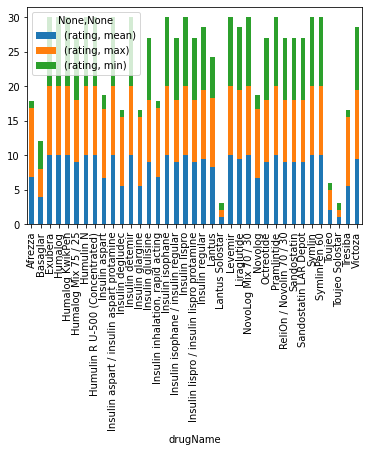

In [481]:
type1.set_index('drugName').groupby('drugName').agg({'rating':['mean','max','min']}).plot(kind='bar',stacked=True)

In [445]:
type1.sort_values(by='rating',ascending=False)

,drugName,rating
1,Afrezza,10
499,Humulin R U-500 (Concentrated),10
1019,Liraglutide,10
1424,Exubera,10
1440,SymlinPen 60,10
...,...,...
204,Afrezza,1
87,Tresiba,1
417,Insulin degludec,1
2570,Lantus Solostar,1


<AxesSubplot:xlabel='drugName'>

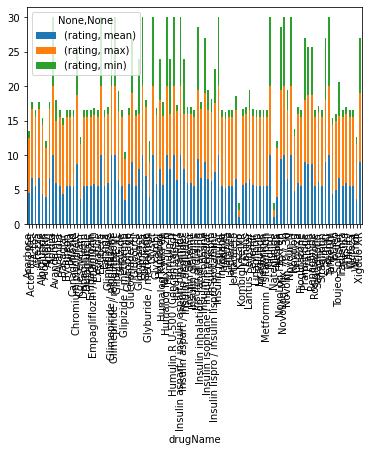

In [480]:
type2.drop_duplicates().groupby('drugName').agg({'rating':['mean','max','min']}).plot(kind='bar',stacked=True)

In [250]:
type2.sort_values(by='rating',ascending=False)

,drugName,rating
743,Farxiga,10
77,Exenatide,10
580,Linagliptin,10
676,Saxagliptin,10
2783,Insulin lispro / insulin lispro protamine,10
...,...,...
479,Jardiance,1
496,Pioglitazone,1
137,Linagliptin,1
502,Nateglinide,1


In [416]:
type1d=type1.sort_values('rating').groupby('drugName').agg({'rating':['mean','max']})
type1d.sort_values(by='drugName')

rating    
                                                mean max
drugName                                                
Afrezza                                     6.833333  10
Basaglar                                    4.000000   4
Exubera                                    10.000000  10
Humalog                                    10.000000  10
Humalog KwikPen                            10.000000  10
Humalog Mix 75 / 25                         9.000000   9
Humulin N                                  10.000000  10
Humulin R U-500 (Concentrated)             10.000000  10
Insulin aspart                              6.666667  10
Insulin aspart / insulin aspart protamine  10.000000  10
Insulin degludec                            5.500000  10
Insulin detemir                            10.000000  10
Insulin glargine                            5.555556  10
Insulin glulisine                           9.000000   9
Insulin inhalation, rapid acting            6.833333  10
Insulin isophane                           10.000000  10
Insulin isophane / insulin regular          9.000000   9
Insulin lispro                             10.000000  10
Insulin lispro / insulin lispro protamine   9.000000   9
Insulin regular                             9.500000  10
Lantus                                      8.250000  10
Lantus Solostar                             1.000000   1
Levemir                                    10.000000  10
Liraglutide                                 9.500000  10
NovoLog Mix 70 / 30                        10.000000  10
Novolog                                     6.666667  10
Octreotide                                  9.000000   9
Pramlintide                                10.000000  10
ReliOn / Novolin 70 / 30                    9.000000   9
Sandostatin                                 9.000000   9
Sandostatin LAR Depot                       9.000000   9
Symlin                                     10.000000  10
SymlinPen 60                               10.000000  10
Toujeo                                      2.000000   3
Toujeo Solostar                             1.000000   1
Tresiba                                     5.500000  10
Victoza                                     9.500000  10

In [417]:
type2d=type2.sort_values('rating').groupby('drugName').agg({'rating':['mean','max']})
type2d.sort_values(by='drugName')

rating    
                  mean max
drugName                  
Acarbose      4.500000   8
ActoPlus Met  6.750000  10
Actos         5.500000  10
Afrezza       6.666667  10
Albiglutide   4.400000  10
...                ...  ..
Tresiba       6.000000  10
Trulicity     5.500000  10
Victoza       5.500000  10
Welchol       3.600000   8
Xigduo XR     9.000000  10

[97 rows x 2 columns]

In [254]:
type1.describe()

,rating
count,85.000000
mean,7.011765
std,3.186632
min,1.000000
25%,4.000000
50%,8.000000
75%,10.000000
max,10.000000


In [255]:
type2.describe()

,rating
count,481.000000
mean,5.889813
std,3.109515
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,10.000000


In [418]:
type1=type1.drop_duplicates()
type2=type2.drop_duplicates()

In [321]:
# type1.plot.hist(x=type1['drugName'],y=type1['rating'])

# Splitting 80:20::train:test

In [458]:
X=type1[['drugName']]
y=type1[['rating']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [448]:
X_train.shape,y_train.shape


((59, 1), (59, 1))

In [341]:
X_test.shape,y_test.shape

((26, 1), (26, 1))

In [343]:
type(X_train),type(y_train),type(X_test),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [344]:
X_train

,drugName
87,Tresiba
95,Humulin N
2315,Insulin lispro / insulin lispro protamine
1331,Insulin lispro
3145,Insulin isophane
744,Insulin regular
656,Afrezza
1594,Victoza
1316,Toujeo
1403,"Insulin inhalation, rapid acting"


# Encoding

In [476]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train = le.fit_transform(X_train)
X_test = le.fit_transform(X_test)

# le.inverse_transform(X_train)


# Models

In [477]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,CategoricalNB
knn=KNeighborsClassifier(n_neighbors=45)
rf=RandomForestClassifier()
gbc=GradientBoostingClassifier()
sv=SVC()
xgb=XGBClassifier()
nb=GaussianNB()

In [479]:
# X_train = le.fit_transform(X_train)
rf.fit(X_train.reshape(-1,1),y_train)
rf.score(X_train.reshape(-1,1),y_train)
y_p=rf.predict(X_test.reshape(-1,1))
x_p=rf.predict(X_train.reshape(-1,1))
accuracy_score(y_p,y_test),accuracy_score(x_p,y_train)
# print(list(le.inverse_transform(X_train)))

C:\Users\Shashwat\AppData\Local\Temp\ipykernel_2300\4051787240.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train.reshape(-1,1),y_train)


(0.19230769230769232, 0.4915254237288136)

In [463]:
gbc.fit(X_train.reshape(-1,1),y_train)
gbc.score(X_train.reshape(-1,1),y_train)
y_p=gbc.predict(X_test.reshape(-1,1))
x_p=gbc.predict(X_train.reshape(-1,1))
accuracy_score(y_p,y_test),accuracy_score(x_p,y_train)
# xt=le.inverse_transform(X_train.reshape(-1,1))

C:\Users\Shashwat\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.19230769230769232, 0.4915254237288136)

In [378]:
sv.fit(X_train.reshape(-1,1),y_train)
sv.score(X_train.reshape(-1,1),y_train)
y_p=sv.predict(X_test.reshape(-1,1))
x_p=sv.predict(X_train.reshape(-1,1))
accuracy_score(y_p,y_test),accuracy_score(x_p,y_train)

C:\Users\Shashwat\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.23076923076923078, 0.3220338983050847)

In [377]:
knn.fit(X_train.reshape(-1,1),y_train)
knn.score(X_train.reshape(-1,1),y_train)
y_p=knn.predict(X_test.reshape(-1,1))
x_p=knn.predict(X_train.reshape(-1,1))
accuracy_score(y_p,y_test),accuracy_score(x_p,y_train)


C:\Users\Shashwat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


(0.23076923076923078, 0.3220338983050847)

In [375]:
nb.fit(X_train.reshape(-1,1),y_train)
nb.score(X_train.reshape(-1,1),y_train)
y_p=nb.predict(X_test.reshape(-1,1))
x_p=nb.predict(X_train.reshape(-1,1))
accuracy_score(y_p,y_test),accuracy_score(x_p,y_train)

C:\Users\Shashwat\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.23076923076923078, 0.3389830508474576)

In [389]:
estimator_list=[('gbc',gbc),('rf',rf)]
stack_model=StackingClassifier(estimators=estimator_list,final_estimator=LogisticRegression())
stack_model.fit(X_train.reshape(-1,1),y_train)
stack_model.score(X_train.reshape(-1,1),y_train)
y_p=stack_model.predict(X_test.reshape(-1,1))
x_p=stack_model.predict(X_train.reshape(-1,1))
accuracy_score(y_p,y_test),accuracy_score(x_p,y_train)


C:\Users\Shashwat\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shashwat\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shashwat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Shashwat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1092: RuntimeWarning: Number of classes in training fold (9) does not match total number of classes (10). Results may not be appropriate for your use case. To fix this, use a 

(0.23076923076923078, 0.288135593220339)